In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

%matplotlib inline

In [2]:
dataset = pd.read_csv('/home/fabio/Área de Trabalho/Python/Olimpiadas', sep=',')

In [3]:
dataset.drop(['Unnamed: 0' , 'Unnamed: 0.1'], axis=1, inplace=True)

In [4]:
dataset.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
1,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN
2,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN
3,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN
4,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13688 entries, 0 to 13687
Data columns (total 14 columns):
Name      13688 non-null object
Sex       13688 non-null object
Age       13688 non-null float64
Height    13512 non-null float64
Weight    13465 non-null float64
Team      13688 non-null object
NOC       13688 non-null object
Games     13688 non-null object
Year      13688 non-null int64
Season    13688 non-null object
City      13688 non-null object
Sport     13688 non-null object
Event     13688 non-null object
Medal     2023 non-null object
dtypes: float64(3), int64(1), object(10)
memory usage: 1.5+ MB


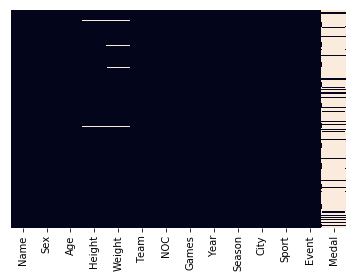

In [6]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False)

In [7]:
dataset.drop(['Name','Games','Year','Season','City','Event'],axis=1,inplace=True)

In [8]:
dataset['Medal'].fillna(value=0, inplace=True)

In [9]:
dataset['Medal'].replace({'Gold' : 1, 'Silver' : 2, 'Bronze' : 3}, inplace=True)

In [10]:
dataset.dropna(inplace=True)

In [11]:
sexo = pd.get_dummies(dataset['Sex'], drop_first=True)

In [12]:
time = pd.get_dummies(dataset['Team'])

In [13]:
pais = pd.get_dummies(dataset['NOC'])

In [14]:
esporte = pd.get_dummies(dataset['Sport'])

In [15]:
dataset.drop(['Sex','Team','NOC','Sport'], axis=1, inplace=True)

In [16]:
dataset.head()

,Age,Height,Weight,Medal
0,22.0,170.0,125.0,0
1,23.0,167.0,64.0,0
2,23.0,167.0,64.0,0
3,23.0,167.0,64.0,0
4,23.0,167.0,64.0,0


In [17]:
dataset = pd.concat ([dataset, sexo, time, pais, esporte], axis=1)

In [18]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(dataset.drop(['Medal'] , axis=1) , dataset['Medal'], train_size=0.8,  test_size=0.2)

In [19]:
logmodel = LogisticRegression()

In [20]:
logmodel.fit(X_Train,Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
pred1 = logmodel.predict(X_Test)

In [22]:
A = (metrics.accuracy_score(Y_Test, pred1))

In [23]:
B = (metrics.f1_score(Y_Test, pred1, average='micro'))

In [24]:
C = (metrics.f1_score(Y_Test, pred1, average='macro'))

/home/fabio/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
knn = KNeighborsClassifier()

In [26]:
knn.fit(X_Train,Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
pred2 = knn.predict(X_Test)

In [28]:
D = (metrics.accuracy_score(Y_Test, pred2))

In [29]:
E = (metrics.f1_score(Y_Test, pred2, average='micro'))

In [30]:
F = (metrics.f1_score(Y_Test, pred2, average='macro'))

In [31]:
svc_model = SVC()

In [32]:
svc_model.fit(X_Train,Y_Train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
pred3 = svc_model.predict(X_Test)

In [34]:
G = (metrics.accuracy_score(Y_Test, pred3))

In [35]:
H =(metrics.f1_score(Y_Test, pred3, average='micro'))

In [38]:
I = (metrics.f1_score(Y_Test, pred3, average='macro'))

/home/fabio/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
np.Comparacao=[[A,B,C],[D,E,F],[G,H,I]]

In [40]:
cp = pd.DataFrame(np.Comparacao, index=('Regressão Logística' , 'K Neighbors', 'Support Vector'), columns=('Acurácia', 'Micro-F1', 'Macro-F1'))

In [41]:
np.Comparacao

[[0.8419486798066196, 0.8419486798066196, 0.23542756809108079],
 [0.8371141688359985, 0.8371141688359987, 0.26304259602648783],
 [0.841576794347341, 0.841576794347341, 0.2284935379644588]]

In [42]:
cp

,Acurácia,Micro-F1,Macro-F1
Regressão Logística,0.841949,0.841949,0.235428
K Neighbors,0.837114,0.837114,0.263043
Support Vector,0.841577,0.841577,0.228494


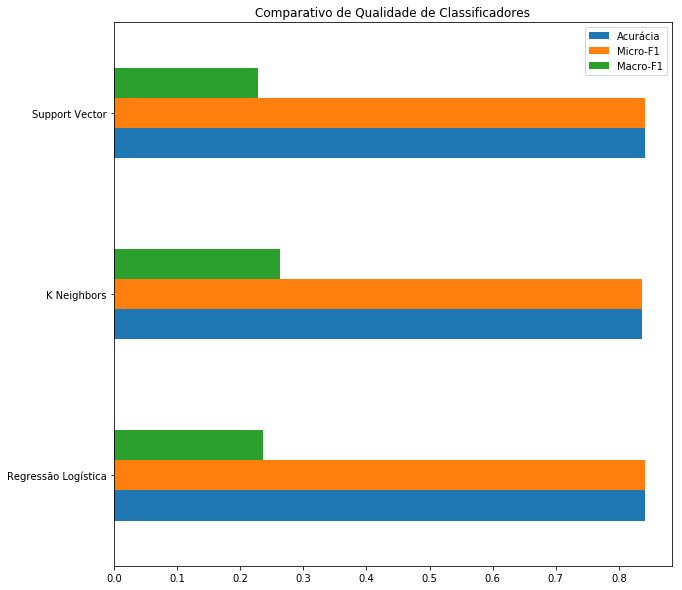

In [43]:
cp.plot(kind='barh', figsize=(10,10), title='Comparativo de Qualidade de Classificadores')